# Problem Statement

In this Naive Bayes Machine Learning model, We'll work on Placement dataset which consists of all information of students and if they are placed or not.

we are going to predict Placement ie. student have been placed or not with some independent variables from the dataset.

## 1. Importing Libraries and Collecting Data

In [104]:
#  Importing libraries for exploratory Data Analysis

import pandas as pd
import numpy as np

#  Importing libraries for Data Visualization

import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline

In [105]:
#  importing Data 
data=pd.read_csv("Placement_Data_Full_Class.csv")

## 2. Analyzing Data

In [106]:
#Observing Top 5 Rows
data.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


In [107]:
#Observing data type and null values for columns
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sl_no           215 non-null    int64  
 1   gender          215 non-null    object 
 2   ssc_p           215 non-null    float64
 3   ssc_b           215 non-null    object 
 4   hsc_p           215 non-null    float64
 5   hsc_b           215 non-null    object 
 6   hsc_s           215 non-null    object 
 7   degree_p        215 non-null    float64
 8   degree_t        215 non-null    object 
 9   workex          215 non-null    object 
 10  etest_p         215 non-null    float64
 11  specialisation  215 non-null    object 
 12  mba_p           215 non-null    float64
 13  status          215 non-null    object 
 14  salary          148 non-null    float64
dtypes: float64(6), int64(1), object(8)
memory usage: 25.3+ KB


In [108]:
# Getting a small insight for outliers.
data.describe()

,sl_no,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary
count,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,148.000000
mean,108.000000,67.303395,66.333163,66.370186,72.100558,62.278186,288655.405405
std,62.209324,10.827205,10.897509,7.358743,13.275956,5.833385,93457.452420
min,1.000000,40.890000,37.000000,50.000000,50.000000,51.210000,200000.000000
25%,54.500000,60.600000,60.900000,61.000000,60.000000,57.945000,240000.000000
50%,108.000000,67.000000,65.000000,66.000000,71.000000,62.000000,265000.000000
75%,161.500000,75.700000,73.000000,72.000000,83.500000,66.255000,300000.000000
max,215.000000,89.400000,97.700000,91.000000,98.000000,77.890000,940000.000000


In [109]:
# Observing For Maximum salary that a student has got.
data.salary.max()

940000.0

In [110]:
# Observing Information about student that have been placed with maximum salary.
data.loc[data.salary==data.salary.max()]

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
119,120,M,60.8,Central,68.4,Central,Commerce,64.6,Comm&Mgmt,Yes,82.66,Mkt&Fin,64.34,Placed,940000.0


In [111]:
len(data)

215

In [112]:
data.isnull().sum()

sl_no              0
gender             0
ssc_p              0
ssc_b              0
hsc_p              0
hsc_b              0
hsc_s              0
degree_p           0
degree_t           0
workex             0
etest_p            0
specialisation     0
mba_p              0
status             0
salary            67
dtype: int64

In [113]:
data.salary.isnull().sum()

67

In [114]:
# Observing how much students have been placed.
data.status.value_counts()

Placed        148
Not Placed     67
Name: status, dtype: int64

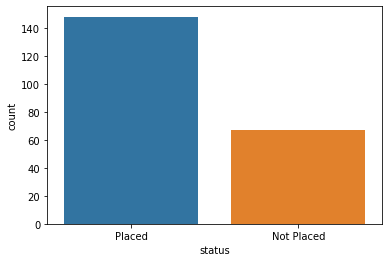

In [115]:
# Observing how much students have been placed with help of count plot.
sb.countplot(x="status",data=data)

In [116]:
data.gender.value_counts()

M    139
F     76
Name: gender, dtype: int64

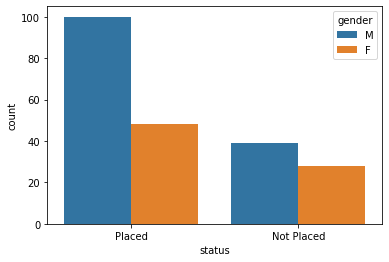

In [117]:
# Observing how much students have been placed with help of count plot based on gender.
sb.countplot(x="status",hue="gender",data=data)

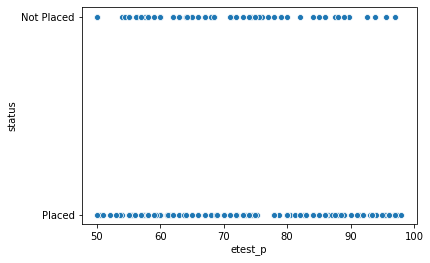

In [118]:
sb.scatterplot(y="status",x="etest_p",data=data)

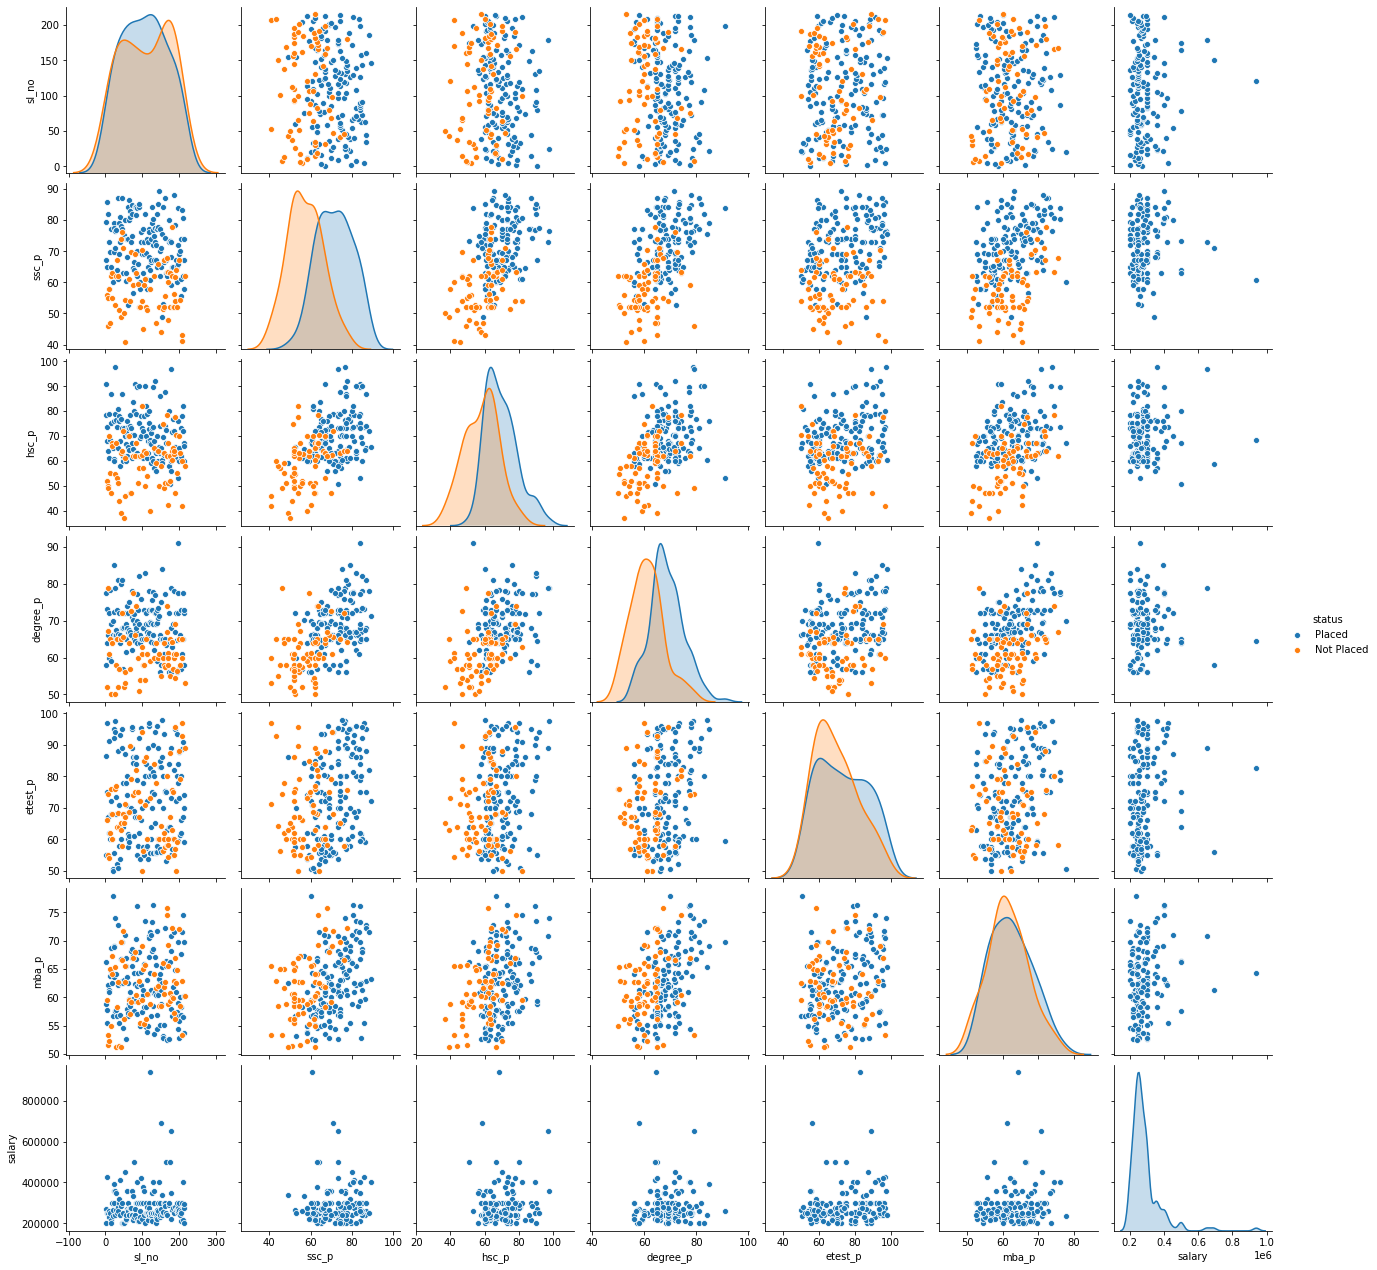

In [119]:
sb.pairplot(data=data,hue="status")

In [120]:
# Applying One-Hot Encoding on workex feature
data["exp"]=pd.get_dummies(data.workex,drop_first=True)
data.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary,exp
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0,0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0,1
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0,0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN,0
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0,0


In [121]:
# Checking correlation between all the variables.
data.corr()

,sl_no,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary,exp
sl_no,1.000000,-0.078155,-0.085711,-0.088281,0.063636,0.022327,0.063764,0.059151
ssc_p,-0.078155,1.000000,0.511472,0.538404,0.261993,0.388478,0.035330,0.175675
hsc_p,-0.085711,0.511472,1.000000,0.434206,0.245113,0.354823,0.076819,0.141025
degree_p,-0.088281,0.538404,0.434206,1.000000,0.224470,0.402364,-0.019272,0.122648
etest_p,0.063636,0.261993,0.245113,0.224470,1.000000,0.218055,0.178307,0.056735
mba_p,0.022327,0.388478,0.354823,0.402364,0.218055,1.000000,0.175013,0.168811
salary,0.063764,0.035330,0.076819,-0.019272,0.178307,0.175013,1.000000,0.136920
exp,0.059151,0.175675,0.141025,0.122648,0.056735,0.168811,0.136920,1.000000


## 3.Train Data and Test Data

In [122]:
#Selecting data for Training and Testing
X=data.iloc[:,[7,10,12,15]]
X.head()

,degree_p,etest_p,mba_p,exp
0,58.00,55.0,58.80,0
1,77.48,86.5,66.28,1
2,64.00,75.0,57.80,0
3,52.00,66.0,59.43,0
4,73.30,96.8,55.50,0


In [123]:
y=data.status
y.head()

0        Placed
1        Placed
2        Placed
3    Not Placed
4        Placed
Name: status, dtype: object

In [124]:
# training and testing model selection
from sklearn.model_selection import train_test_split

In [125]:
#Splitting Train and Test data
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=1)

In [126]:
from sklearn.preprocessing import StandardScaler

In [127]:
sc= StandardScaler()
 
X_train = sc.fit_transform(X_train)
 
X_test = sc.transform(X_test)

In [128]:
# Importing machine learning algorithm
from sklearn.naive_bayes import GaussianNB

In [129]:
nb=GaussianNB()

In [130]:
model=nb.fit(X_train,y_train)

In [131]:
prediction=model.predict(X_test)

In [132]:
pd.DataFrame([list(prediction),list(y_test)]) #Compairing predicted value and actual value

,0,1,2,3,4,5,6,7,8,9,...,44,45,46,47,48,49,50,51,52,53
0,Placed,Placed,Not Placed,Placed,Not Placed,Placed,Placed,Placed,Placed,Not Placed,...,Placed,Placed,Placed,Placed,Placed,Not Placed,Placed,Placed,Not Placed,Placed
1,Placed,Placed,Not Placed,Placed,Not Placed,Placed,Placed,Placed,Placed,Not Placed,...,Placed,Placed,Placed,Placed,Placed,Not Placed,Placed,Placed,Not Placed,Placed


## 4. Accuracy Check

In [133]:
# Importing Accuracy measures algorithms.
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

In [134]:
confusion_matrix(y_test,prediction)

array([[14,  3],
       [ 4, 33]])

In [135]:
print(classification_report(y_test,prediction))

              precision    recall  f1-score   support

  Not Placed       0.78      0.82      0.80        17
      Placed       0.92      0.89      0.90        37

    accuracy                           0.87        54
   macro avg       0.85      0.86      0.85        54
weighted avg       0.87      0.87      0.87        54



In [136]:
accuracy_score(y_test,prediction)

0.8703703703703703